<a href="https://colab.research.google.com/github/oshinrathor/datSci/blob/main/yhills_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
df=pd.read_csv("TaxiFare.csv")
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [190]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [191]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [192]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [193]:
# There are no missing values in this dataset.

In [194]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [195]:
#The minimal amount is negative. As this does not seem to be realistic I will drop them from the dataset.

In [196]:
df.drop('unique_id', axis=1, inplace=True)

In [197]:
print('Old size: %d' % len(df))
df = df[df.amount>=0]
print('New size: %d' % len(df))

Old size: 50000
New size: 49994


In [198]:
print('Old size: %d' % len(df))
df = df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(df))

Old size: 49994
New size: 49994


In [199]:
#Some of the minimum and maximum longitude/lattitude coordinates are way off. These I will also remove from the dataset.

In [200]:
#I define a bounding box of interest by [long_min, long_max, latt_min, latt_max] using the minimum and maximum coordinates from the testset. This way, I'm sure to train a model for the full pickup/dropoff coordinate range of the test set.

In [201]:
# minimum and maximum longitude test set
min(df.longitude_of_pickup.min(), df.longitude_of_dropoff.min()), \
max(df.longitude_of_pickup.max(), df.longitude_of_dropoff.max())

(-84.654241, 40.851027)

In [202]:
# minimum and maximum latitude test
min(df.latitude_of_pickup.min(), df.latitude_of_dropoff.min()), \
max(df.latitude_of_pickup.max(), df.latitude_of_dropoff.max())

(-74.006893, 401.083332)

In [203]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.longitude_of_pickup >= BB[0]) & (df.longitude_of_pickup <= BB[1]) & \
           (df.latitude_of_pickup >= BB[2]) & (df.latitude_of_pickup <= BB[3]) & \
           (df.longitude_of_dropoff >= BB[0]) & (df.longitude_of_dropoff <= BB[1]) & \
           (df.latitude_of_dropoff >= BB[2]) & (df.latitude_of_dropoff <= BB[3])

# load image of NYC map
BB = (-84.6, 40.8, -74.0, 41.8)

In [204]:
print('Old size: %d' % len(df))
df = df[select_within_boundingbox(df, BB)]
print('New size: %d' % len(df))

Old size: 49994
New size: 49984


In [205]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

**Distance visualisation**

In [206]:
#Before building a model I want to test:

#The longer the distance between pickup and dropoff location, the higher the fare. To visualize the distance - fare relation we need to calculate the distance of a trip first.

In [207]:
# For this plot and further analysis, we need a function to calculate the distance in miles between locations in lon,lat coordinates.

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

df['distance_miles'] = distance(df.latitude_of_pickup, df.longitude_of_pickup, \
                                      df.latitude_of_dropoff, df.longitude_of_dropoff)

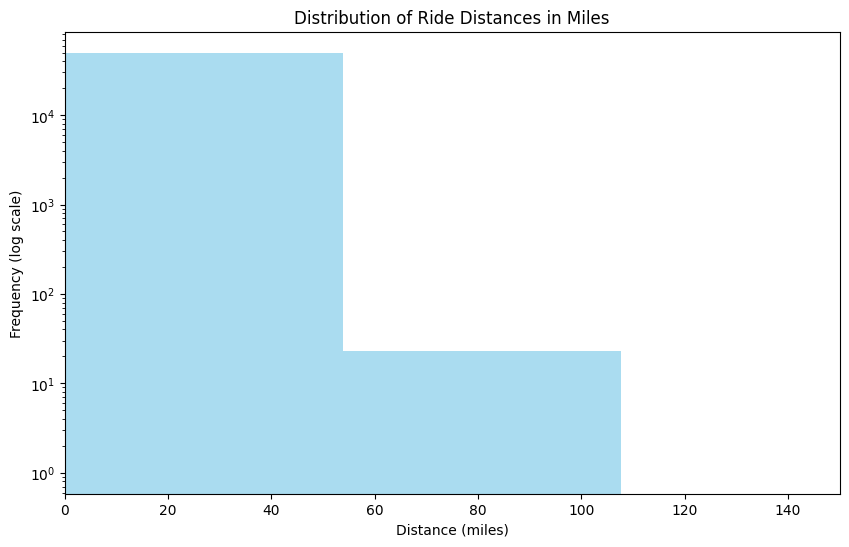

In [208]:
# add new column to dataframe with distance in miles
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram with logarithmic scale on y-axis
ax.hist(df['distance_miles'], bins=100, color='skyblue', alpha=0.7)
ax.set_yscale('log')

# Limit the x-axis range to exclude outliers
ax.set_xlim(0, 150)

# Set labels and title
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Ride Distances in Miles')

# Display the plot
plt.show()

In [209]:
df.groupby('no_of_passenger')['distance_miles', 'amount'].mean()

,distance_miles,amount
no_of_passenger,,
0,132.420320,9.414545
1,11.573665,11.212253
2,8.305378,12.013336
3,9.519631,11.219359
4,23.238271,11.473360
5,8.319510,11.345435
6,7.642741,12.495820


In [210]:
# remove datapoints with distance <0.05 miles
idx = (df.distance_miles >= 0.05)
print('Old size: %d' % len(df))
df = df[idx]
print('New size: %d' % len(df))

Old size: 49984
New size: 48269


In [211]:
import warnings
warnings.filterwarnings("ignore")

In [212]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

# Convert the Timestamps to seconds since the reference point (for example, UNIX timestamp)
df['date_time_of_pickup'] = df['date_time_of_pickup'].astype(int) / 10**9

df.drop('distance_miles', axis=1, inplace=True)

# **Building Models**

In [213]:
# Based on the analysis above, I would start with the following models:

In [214]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [215]:
y=df['amount']
x=df.drop(['amount'], axis=1)

In [216]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=0.25, random_state=88)

# **Linear Regression**

In [217]:
model = LinearRegression()

model.fit(x_train,y_train)

print(f"Training Score : {model.score(x_train, y_train)}")
print(f"Testing Score : {model.score(x_test, y_test)}")

Training Score : 0.017729746916952616
Testing Score : 0.01870200497239738


In [219]:
from sklearn.metrics import mean_squared_error
avg_fare=round(np.mean(y_train),2) #11.31
baseline_pred=np.repeat(avg_fare,y_test.shape[0])
baseline_rmse=np.sqrt(mean_squared_error(baseline_pred, y_test))
print("Basline RMSE of Validation data :",baseline_rmse)

Basline RMSE of Validation data : 9.292502589018783


# **Decision Tree Regressor**

In [225]:
from sklearn.tree import DecisionTreeRegressor
model_2=DecisionTreeRegressor(max_depth=3)
model_2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [226]:
model_2.score(x_train,y_train)

0.5563335627381728

In [227]:
model_2.score(x_test,y_test)

0.5583545046138765

# **Bagging Regression Model**

In [228]:
from sklearn.ensemble import BaggingRegressor
model_3=BaggingRegressor(n_estimators=90,base_estimator=model_2)
model_3.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                 n_estimators=90)

In [229]:
model_3.score(x_train,y_train)

0.5692059269824705

In [230]:
model_3.score(x_test,y_test)

0.5691959637669594

# **AdaBoost Regression Model**

In [231]:
from sklearn.ensemble import AdaBoostRegressor
model_4=AdaBoostRegressor(n_estimators=25)
model_4.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=25)

In [232]:
model_4.score(x_train,y_train)

0.15633307576386002

In [233]:
model_4.score(x_test,y_test)

0.12954642859174803

# **GradientBoosting Regression Model**

In [234]:
from sklearn.ensemble import GradientBoostingRegressor
model_5=GradientBoostingRegressor()
model_5.fit(x_train,y_train)

GradientBoostingRegressor()

In [235]:
model_5.score(x_train,y_train)

0.8206672416339882

In [236]:
model_5.score(x_test,y_test)

0.7890060636866733

# **RandomForest Regression Model**

In [237]:
from sklearn.ensemble import RandomForestRegressor
model_6=RandomForestRegressor(n_estimators=1,max_features=1)
model_6.fit(x_train,y_train)

RandomForestRegressor(max_features=1, n_estimators=1)

In [238]:
model_6.score(x_train,y_train)

0.8295950412354482

In [239]:
model_5.score(x_test,y_test)

0.7890060636866733

In [240]:
# No overfitting in models